# Brain Scan Inspection

Looking through the cut off brains  


In [78]:
from nilearn import image
import glob, os
from nilearn import plotting

import matplotlib.pyplot as plt

import shutil

In [80]:
ses1_list=[ 'sub-164', 'sub-168', 'sub-169', 'sub-170']
ses2_list=[ 'sub-133', 'sub-151', 'sub-157', 'sub-164', 'sub-169' ]

In [81]:
dest='/projects/niblab/experiments/bbx/data/quality_analysis/feat1_mean_files'
for sub in ses2_list:
    
    ses='ses-2'
    png=glob.glob(os.path.join('/projects/niblab/experiments/bbx/data/preprocessed/subs_trimmed/%s/%s'%(sub,ses),
                     'fsl_feat1/%s_%s_task-training_run-*_19contrasts.feat/mean_func.nii.gz'%(sub,ses)))
    
    
    
    for p in png:
        run=p.split("/")[-2].split("_")[3]
        
        newdest=os.path.join(dest, '%s_%s_%s_mean_func.nii.gz'%(sub, ses, run))

        shutil.copy(p, newdest)
    

In [70]:
def plot_epi(func):
    
    
    # Compute the voxel_wise mean of functional images across time.
    # Basically reducing the functional image from 4D to 3D
    mean_img = image.mean_img(func)
    
    sub=func.split("/")[-1].split("_")[0]
    ses=func.split("/")[-1].split("_")[1]
    run=func.split("/")[-1].split("_")[3]
    task=func.split("/")[-1].split("_")[2]
    
    #fig = plt.figure(figsize=(8, 4))
    title="%s %s %s %s "%(sub, ses, run, task)
    outfile=os.path.join('/projects/niblab/experiments/bbx/data/quality_analysis/fmriprep_pngs',
                        "%s_%s_%s_%s.png"%(sub, ses, run, task))
    
    # Visualizing mean image (3D)
    plotting.plot_epi(mean_img, display_mode='yx', title=title,
                     output_file=outfile)
    plt.show()
    


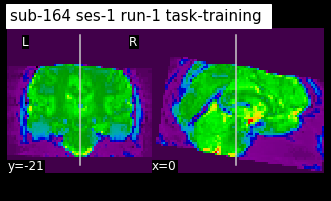

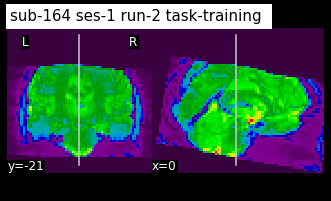

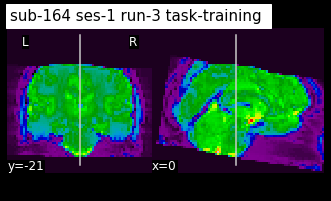

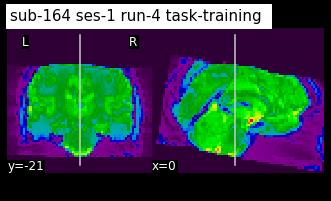

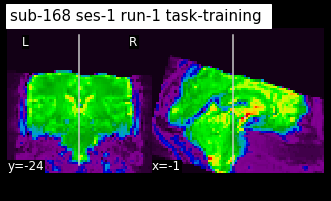

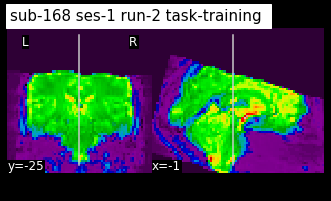

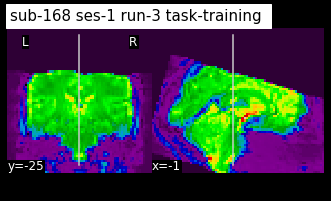

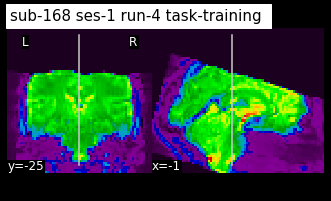

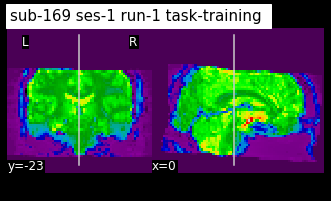

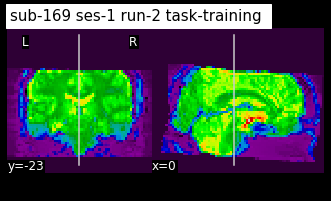

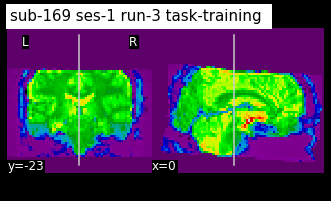

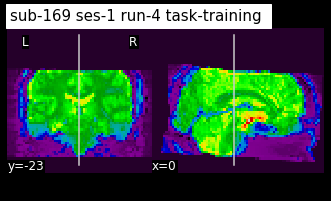

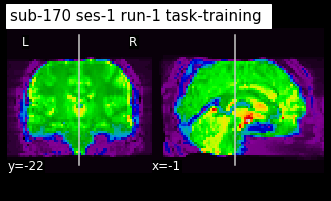

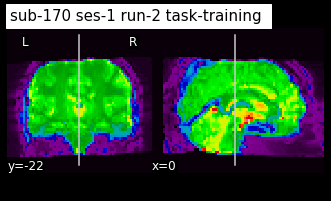

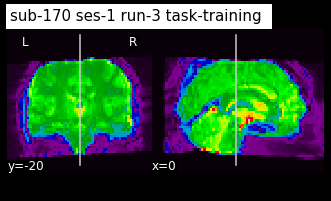

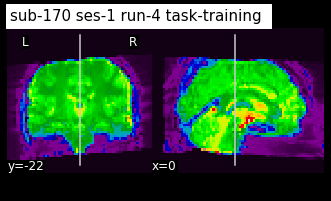

In [67]:
for sub in ses1_list:
    ses='ses-1'
    path='/projects/niblab/experiments/bbx/data/fmriprep/fmriprep_trimmed-20.2.0/%s/%s/func'%(sub,ses)

    funcs=glob.glob(os.path.join(path,'sub-*task-training*_bold.nii.gz'))
    funcs.sort()
    for func in funcs:
        plot_epi(func=func)

In [71]:
for sub in ses2_list:
    ses='ses-2'
    path='/projects/niblab/experiments/bbx/data/fmriprep/fmriprep_trimmed-20.2.0/%s/%s/func'%(sub,ses)

    funcs=glob.glob(os.path.join(path,'sub-*task-training*_bold.nii.gz'))
    funcs.sort()
    for func in funcs:
        plot_epi(func=func)

In [72]:
pngs=glob.glob('/projects/niblab/experiments/bbx/data/quality_analysis/fmriprep_pngs/*')

In [57]:
from fpdf import FPDF
#import img2pdf


In [73]:
pdf = FPDF()
# imagelist is the list with all image filenames
pdf.add_page()
for image in pngs:

    pdf.image(image)#,x,y,w,h)
pdf.output("/projects/niblab/experiments/bbx/data/quality_analysis/bad_reg_brain_scans.pdf", "F")

''